In [ ]:
import pandas as pd

# Đọc 3 DataFrame
df = pd.read_csv('/content/full-1.csv')
df_2 = pd.read_csv('/content/2025 (2).csv')
df_3 = pd.read_csv('/content/2026.csv')



merged_df = pd.concat([df, df_2, df_3], axis=0, ignore_index=True, sort=False)

# Hiển thị DataFrame sau khi merge
print(merged_df.head())
df = merged_df

In [ ]:
df.to_csv('merged.csv', index=False)

In [ ]:
z = []
for i in df["room_info"]:
  z.append(i)
print(z[:100])



['1 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắm riêngChủ nhà siêu cấp ·· 7 năm kinh nghiệm đón tiếp khách', '1 giường ·· Phòng vệ sinh chungChủ nhà siêu cấp ·· 5 tháng kinh nghiệm đón tiếp khách', '2 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắmChủ nhà siêu cấp ·· 7 năm kinh nghiệm đón tiếp khách', '1 giường ·· Phòng vệ sinh chungChủ nhà siêu cấp ·· 7 năm kinh nghiệm đón tiếp khách', '2 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắm đầy đủ và 1 phòng vệ sinh cơ bản riêng1 năm kinh nghiệm đón tiếp khách', '1 giường ·· Phòng tắm khép kín2 tháng kinh nghiệm đón tiếp khách', '2 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắmChủ nhà siêu cấp ·· 7 năm kinh nghiệm đón tiếp khách', '2 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắm chungChủ nhà siêu cấp ·· 1 năm kinh nghiệm đón tiếp khách', '1 giường king ·· Phòng tắm khép kínChủ nhà siêu cấp ·· 7 năm kinh nghiệm đón tiếp khách', '2 khách ·· 1 phòng ngủ\xa0 ·· 1 giường ·· 1 phòng tắmChủ nhà siêu cấp ·· 5 tháng kinh n

In [ ]:
import pandas as pd
import re

def parse_room_info(text):
    # Sử dụng regular expressions để tìm các phần thông tin cần tách
    guests = re.search(r'(\d+)\s*khách', text)
    beds = re.search(r'(\d+)\s*giường', text)
    bedrooms = re.search(r'(\d+)\s*phòng ngủ', text)
    bathrooms = re.search(r'(\d+)\s*phòng tắm', text)
    bathroom_type = re.search(r'phòng tắm\s*(riêng|chung|khép kín|tách biệt|đầy đủ)', text)
    experience = re.search(r'(\d+)\s*(năm|tháng)\s*kinh nghiệm', text)

    # Lấy các giá trị nếu tìm thấy
    guests = int(guests.group(1)) if guests else None
    beds = int(beds.group(1)) if beds else None
    bedrooms = int(bedrooms.group(1)) if bedrooms else None
    bathrooms = int(bathrooms.group(1)) if bathrooms else None
    bathroom_type = bathroom_type.group(1) if bathroom_type else None

    # Kiểm tra và xử lý kinh nghiệm (năm/tháng)
    if experience:
        exp_number = int(experience.group(1))
        exp_unit = experience.group(2)
        if exp_unit == 'tháng':
            experience = exp_number / 12  # Chuyển đổi tháng sang năm
        else:
            experience = exp_number  # Giữ nguyên nếu là năm

    return pd.Series([guests, beds, bedrooms, bathrooms, bathroom_type, experience])

# Áp dụng hàm tách cho mỗi dòng dữ liệu
df[['guests', 'beds', 'bedrooms', 'bathrooms', 'bathroom_type', 'experience']] = df['room_info'].apply(parse_room_info)


In [ ]:
# df_unique = df.drop_duplicates(subset='name')

In [ ]:
# duplicates = df[df.duplicated(subset='name', keep=False)]

In [ ]:
df_unique = df

In [ ]:
df_unique.columns


Index(['lat', 'lon', 'name', 'check_in', 'check_out', 'room_info',
       'price_1_day', 'Lối ra hồ', 'Bếp', 'Wi-fi',
       ...
       'TV HD 55 inch', 'Wi-fi – tốc độ 12 Mbps', 'TV 36 inch',
       'Nhà để xe miễn phí, trong khuôn viên – 10 chỗ', 'guests', 'beds',
       'bedrooms', 'bathrooms', 'bathroom_type', 'experience'],
      dtype='object', length=360)

In [ ]:
# Identify columns related to TV and Wi-Fi
tv_columns = [col for col in df_unique.columns if 'tv' in col.lower()]
wifi_columns = [col for col in df_unique.columns if col.startswith('Wi-fi')]

# Merge TV-related columns into a single column
df_unique['TV_features'] = df_unique[tv_columns].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)

# Optionally, drop the original TV and Wi-Fi columns
df_unique = df_unique.drop(columns=tv_columns + wifi_columns)

# Display the first few rows of the updated DataFrame
print(df_unique[['TV_features']])
df_unique.shape

     TV_features
0            1.0
1               
2            1.0
3               
4            1.0
...          ...
6523         1.0
6524         1.0
6525         1.0
6526         1.0
6527         1.0

[6528 rows x 1 columns]


(6528, 169)

In [ ]:
df_unique.drop(columns = ["room_info","name"])

,lat,lon,check_in,check_out,price_1_day,Lối ra hồ,Bếp,Chỗ đỗ xe miễn phí tại nơi ở,Máy giặt phí Miễn phí – Trong toà nhà,Điều hòa nhiệt độ,...,Sân sau riêng,"Hồ bơi chung ngoài trời – có sẵn hoặc phục vụ quanh năm, mở cửa theo giờ giấc cụ thể, vô cực","Nhà để xe miễn phí, trong khuôn viên – 10 chỗ",guests,beds,bedrooms,bathrooms,bathroom_type,experience,TV_features
0,21.03382,105.82192,2025-01-01,2025-01-07,₫256.000,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,riêng,7.000000,1.0
1,21.04300,105.83690,2025-01-01,2025-01-07,₫304.824,NaN,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.416667,
2,21.06280,105.82350,2025-01-01,2025-01-07,₫412.469,NaN,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,7.000000,1.0
3,21.02230,105.82340,2025-01-01,2025-01-07,₫304.824,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.000000,
4,21.06120,105.82640,2025-01-01,2025-01-07,₫370.362,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,1.0,1.0,1.0,đầy đủ,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,21.03669,105.82234,2026-12-01,2026-12-07,₫407.213,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.000000,1.0
6524,21.20283,105.83210,2026-12-01,2026-12-07,₫495.000,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,2.0,3.0,2.0,1.0,riêng,2.000000,1.0
6525,21.03342,105.80823,2026-12-01,2026-12-07,₫407.213,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8.000000,1.0
6526,21.02060,105.77910,2026-12-01,2026-12-07,₫727.777,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,1.0,NaN,1.0,riêng,3.000000,1.0


In [ ]:
print(list(df_unique.columns))

['lat', 'lon', 'name', 'check_in', 'check_out', 'room_info', 'price_1_day', 'Lối ra hồ', 'Bếp', 'Chỗ đỗ xe miễn phí tại nơi ở', 'Máy giặt phí Miễn phí – Trong toà nhà', 'Điều hòa nhiệt độ', 'Sân hoặc ban công', 'Máy phát hiện khí COMáy phát hiện khí CO', 'Máy báo khóiMáy báo khói', 'rating cleanliness', 'rating Accuracy', 'rating Check in', 'rating Communicate', 'rating Location', 'rating Value', 'Khóa ở cửa phòng ngủ', 'Bồn tắm', 'Máy sấy tóc', 'Chỗ ở có camera an ninh ngoài nhà', 'total_reviews', 'Không gian riêng để làm việc', 'Máy giặt', 'Cũi', 'Cho phép gửi hành lý', 'Tủ lạnh', 'Thang máy', 'Lò sưởi trong nhà', 'Máy sấy quần áo', 'Cho phép thú cưng', 'Máy sấy phí Miễn phí – Trong toà nhà', 'Tủ lạnh Aqua', 'Khóa ở cửa phòng ngủKhóa ở cửa phòng ngủ', 'Đỗ xe miễn phí trên đường vào nhà, trong khuôn viên', 'Ven sông/hồ/biển', 'Hướng nhìn ra đường chân trời thành phố', 'Hướng nhìn ra hồ', 'Bồn tắm nước nóng', 'Máy sấy phí Miễn phí – Trong căn hộ', 'Sân hiên chung hoặc ban công chung', 

In [ ]:
def merge_parking_and_features(df):
    # Merge columns that contain 'đỗ xe' or 'để xe' in the string values (case-insensitive)
    parking_columns = [col for col in df.columns if df[col].astype(str).str.contains(r'đỗ xe|để xe', case=False, na=False).any()]

    # Merge columns by concatenating them row by row for parking-related columns
    if parking_columns:  # Ensure there are columns to merge
        df['merged_parking_info'] = df[parking_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
    else:
        df['merged_parking_info'] = None  # No matching columns, set it to None or an empty string

    # Separate the columns related to specific features like 'giặt', 'điều hòa', 'máy sấy', 'hồ bơi'
    feature_keywords = ['giặt', 'điều hòa', 'máy sấy', 'hồ bơi']
    cols_to_drop = []
    for keyword in feature_keywords:
        feature_columns = [col for col in df.columns if keyword in col.lower()]
        cols_to_drop.extend(feature_columns)
        if feature_columns:
            # Create a new column for each feature (giặt, điều hòa, máy sấy, hồ bơi)
            feature_column_name = keyword  # Use the feature name directly (e.g., 'giặt')
            df[feature_column_name] = df[feature_columns].fillna(0).sum(axis=1)
        else:
            df[keyword] = None  # Set to None if no feature columns match

    columns_to_drop = parking_columns + cols_to_drop  # List of columns to remove after merging
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Ignore errors if columns don't exist

    return df

# Apply the function to the DataFrame
df_unique = merge_parking_and_features(df_unique)

# Display the resulting DataFrame with separate columns for 'giặt', 'điều hòa', 'máy sấy', 'hồ bơi'
print(df_unique[['merged_parking_info', 'giặt', 'điều hòa', 'máy sấy', 'hồ bơi']])

                                    merged_parking_info  giặt  điều hòa  \
0                                              Apart A3   1.0       1.0   
1                                        Phòng ban công   0.0       1.0   
2            R601 - Studio ấm cúng cho cặp đôi ở Tây Hồ   1.0       1.0   
3              Phòng màu vàng. Nhà của một kiến trúc sư   0.0       1.0   
4        Tầng thượng | Gần Hồ Tây | Máy chiếu | Netflix   1.0       0.0   
...                                                 ...   ...       ...   
6523  Quyet Homestay số2 (phòng & ban công Vịnh Hạ L...   0.0       0.0   
6524    Khách Sạn Sân Bay Nội Bài -Hanoi Airport Suites   0.0       1.0   
6525           Phòng Kiwi (23), Homestay ấm cúng Hà Nội   1.0       1.0   
6526  5 phút đến Keangnam, căn hộ hiện đại ấm cúng c...   0.0       0.0   
6527  5 phút đến Keangnam, căn hộ hiện đại ấm cúng A...   1.0       1.0   

      máy sấy  hồ bơi  
0         0.0     0.0  
1         1.0     0.0  
2         1.0     0.0  
3  

In [ ]:
list(df_unique.columns)

['lat',
 'lon',
 'check_in',
 'check_out',
 'room_info',
 'price_1_day',
 'Lối ra hồ',
 'Bếp',
 'Chỗ đỗ xe miễn phí tại nơi ở',
 'Sân hoặc ban công',
 'Máy phát hiện khí COMáy phát hiện khí CO',
 'Máy báo khóiMáy báo khói',
 'rating cleanliness',
 'rating Accuracy',
 'rating Check in',
 'rating Communicate',
 'rating Location',
 'rating Value',
 'Khóa ở cửa phòng ngủ',
 'Bồn tắm',
 'Chỗ ở có camera an ninh ngoài nhà',
 'total_reviews',
 'Không gian riêng để làm việc',
 'Cũi',
 'Cho phép gửi hành lý',
 'Tủ lạnh',
 'Thang máy',
 'Lò sưởi trong nhà',
 'Cho phép thú cưng',
 'Tủ lạnh Aqua',
 'Khóa ở cửa phòng ngủKhóa ở cửa phòng ngủ',
 'Đỗ xe miễn phí trên đường vào nhà, trong khuôn viên',
 'Ven sông/hồ/biển',
 'Hướng nhìn ra đường chân trời thành phố',
 'Hướng nhìn ra hồ',
 'Bồn tắm nước nóng',
 'Sân hiên chung hoặc ban công chung',
 'Chỗ đỗ xe ngoài khuôn viên, có thu phí',
 'Hướng nhìn ra sân trong',
 'Đỗ xe miễn phí trên đường vào nhà, trong khuôn viên – 1 chỗ',
 'Miễn phí đỗ xe trên đư

In [ ]:
nan_count_per_column = df_unique.isna().sum()

# Output the result
print(list(nan_count_per_column))


[0, 0, 0, 0, 0, 0, 5277, 964, 3990, 6112, 2033, 3688, 428, 428, 428, 428, 428, 428, 5768, 6044, 3164, 3434, 1682, 6376, 5452, 6220, 3824, 6433, 4863, 6497, 6410, 6479, 5884, 5488, 6231, 5733, 6411, 6453, 6012, 6492, 6122, 6494, 6206, 6097, 6378, 6470, 6516, 6235, 6509, 6216, 6229, 6431, 6501, 6492, 6193, 6521, 6389, 6458, 6470, 6505, 6527, 6527, 6430, 6527, 6446, 6480, 6433, 6520, 6524, 6515, 6491, 6496, 6515, 6513, 6512, 6510, 6515, 6525, 6522, 6489, 6518, 6525, 6506, 6523, 6525, 6515, 6525, 6516, 6511, 6504, 6502, 6520, 6526, 6501, 6524, 6499, 6511, 6525, 6525, 6521, 6527, 6521, 6527, 878, 93, 1297, 906, 5366, 50, 0, 0, 0, 0, 0, 0]


In [ ]:
threshold = 0.7  # 70% threshold

# Calculate the threshold for non-null values
df_unique = df_unique.loc[:, df_unique.isnull().mean() < threshold]

In [ ]:
df_unique.columns

Index(['lat', 'lon', 'check_in', 'check_out', 'room_info', 'price_1_day',
       'Bếp', 'Chỗ đỗ xe miễn phí tại nơi ở',
       'Máy phát hiện khí COMáy phát hiện khí CO', 'Máy báo khóiMáy báo khói',
       'rating cleanliness', 'rating Accuracy', 'rating Check in',
       'rating Communicate', 'rating Location', 'rating Value',
       'Chỗ ở có camera an ninh ngoài nhà', 'total_reviews',
       'Không gian riêng để làm việc', 'Thang máy', 'guests', 'beds',
       'bedrooms', 'bathrooms', 'experience', 'TV_features',
       'merged_parking_info', 'giặt', 'điều hòa', 'máy sấy', 'hồ bơi'],
      dtype='object')

In [ ]:
columns_to_drop = ['rating cleanliness', 'rating Accuracy', 'rating Check in',
                   'rating Communicate', 'rating Location', 'rating Value', 'total_reviews']

# Create a new DataFrame excluding these columns
df_new = df_unique.drop(columns=columns_to_drop)

In [ ]:
df_new.columns

Index(['lat', 'lon', 'check_in', 'check_out', 'room_info', 'price_1_day',
       'Bếp', 'Chỗ đỗ xe miễn phí tại nơi ở',
       'Máy phát hiện khí COMáy phát hiện khí CO', 'Máy báo khóiMáy báo khói',
       'Chỗ ở có camera an ninh ngoài nhà', 'Không gian riêng để làm việc',
       'Thang máy', 'guests', 'beds', 'bedrooms', 'bathrooms', 'experience',
       'TV_features', 'merged_parking_info', 'giặt', 'điều hòa', 'máy sấy',
       'hồ bơi'],
      dtype='object')

In [ ]:
df_new['check_in'].unique()

array(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
       '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
       '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
       '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
       '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
       '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01'],
      dtype=object)

In [ ]:
df_new['check_in'] = pd.to_datetime(df_new['check_in'])

# Extract the year and month
df_new['year'] = df_new['check_in'].dt.year
df_new['month'] = df_new['check_in'].dt.month

In [ ]:
# df_new.drop(columns = ["merged_parking_info", "room_info", "check_in", "check_out"], inplace = True)

In [ ]:
df_new.drop(columns = ["Máy phát hiện khí COMáy phát hiện khí CO", "Máy báo khóiMáy báo khói", "Không gian riêng để làm việc", "check_in", "check_out", "room_info", "merged_parking_info"], inplace = True)

In [ ]:
df_new

,lat,lon,price_1_day,Bếp,Chỗ đỗ xe miễn phí tại nơi ở,Chỗ ở có camera an ninh ngoài nhà,Thang máy,guests,beds,bedrooms,bathrooms,experience,TV_features,giặt,điều hòa,máy sấy,hồ bơi,year,month
0,21.03382,105.82192,₫256.000,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,7.000000,1.0,1.0,1.0,0.0,0.0,2025,1
1,21.04300,105.83690,₫304.824,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,0.416667,,0.0,1.0,1.0,0.0,2025,1
2,21.06280,105.82350,₫412.469,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,7.000000,1.0,1.0,1.0,1.0,0.0,2025,1
3,21.02230,105.82340,₫304.824,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7.000000,,0.0,1.0,1.0,0.0,2025,1
4,21.06120,105.82640,₫370.362,1.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,21.03669,105.82234,₫407.213,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,7.000000,1.0,0.0,0.0,0.0,0.0,2026,12
6524,21.20283,105.83210,₫495.000,NaN,1.0,1.0,NaN,2.0,3.0,2.0,1.0,2.000000,1.0,0.0,1.0,1.0,0.0,2026,12
6525,21.03342,105.80823,₫407.213,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.000000,1.0,1.0,1.0,0.0,0.0,2026,12
6526,21.02060,105.77910,₫727.777,1.0,NaN,NaN,1.0,2.0,1.0,NaN,1.0,3.000000,1.0,0.0,0.0,0.0,0.0,2026,12


In [ ]:
# df_new["Không gian riêng để làm việc"].nunique()

In [ ]:
df_new.describe()

,lat,lon,Bếp,Chỗ đỗ xe miễn phí tại nơi ở,Chỗ ở có camera an ninh ngoài nhà,Thang máy,guests,beds,bedrooms,bathrooms,experience,giặt,điều hòa,máy sấy,hồ bơi,year,month
count,6528.000000,6528.000000,5564.0,2538.0,3364.0,2704.0,5650.000000,6435.000000,5231.000000,5622.000000,6478.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000
mean,21.031282,105.844752,1.0,1.0,1.0,1.0,3.482832,1.610256,1.375263,1.251868,3.453162,0.608456,0.669424,0.486979,0.056219,2025.486979,6.457108
std,0.023067,0.028221,0.0,0.0,0.0,0.0,2.388340,1.222301,0.854004,0.769615,2.707385,0.488133,0.491169,0.527313,0.230362,0.499869,3.449697
min,20.939994,105.737100,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,2025.000000,1.000000
25%,21.026400,105.840300,1.0,1.0,1.0,1.0,2.000000,1.000000,1.000000,1.000000,0.916667,0.000000,0.000000,0.000000,0.000000,2025.000000,3.000000
50%,21.032180,105.846440,1.0,1.0,1.0,1.0,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2025.000000,6.000000
75%,21.037250,105.851900,1.0,1.0,1.0,1.0,4.000000,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.000000,2026.000000,9.000000
max,21.286840,105.950200,1.0,1.0,1.0,1.0,16.000000,13.000000,10.000000,13.000000,10.000000,1.000000,3.000000,2.000000,1.000000,2026.000000,12.000000


In [ ]:
df_new['price_1_day'] = df_new['price_1_day'].replace({'₫': '', '\.': ''}, regex=True).astype(int)


In [ ]:
df_new.isna().sum()


,0
lat,0
lon,0
price_1_day,0
Bếp,964
Chỗ đỗ xe miễn phí tại nơi ở,3990
Chỗ ở có camera an ninh ngoài nhà,3164
Thang máy,3824
guests,878
beds,93
bedrooms,1297


In [ ]:
df_new = df_new[df_new.isna().sum(axis=1) < 4]

In [ ]:
df_new = df_new.dropna(subset=['bedrooms'])

In [ ]:
df_new = df_new.dropna(subset=['beds'])

In [ ]:
df_new = df_new.dropna(subset=['experience'])

In [ ]:
df_new = df_new.dropna(subset=['bathrooms'])

In [ ]:
df_new.isna().sum()



,0
lat,0
lon,0
price_1_day,0
Bếp,503
Chỗ đỗ xe miễn phí tại nơi ở,2937
Chỗ ở có camera an ninh ngoài nhà,2286
Thang máy,2689
guests,0
beds,0
bedrooms,0


In [ ]:
df["Chỗ đỗ xe miễn phí tại nơi ở"].nunique()

1

In [ ]:
df_new.shape

(4945, 19)

In [ ]:
df_new = df_new.fillna(0)
df_new = df_new.replace('', 0)


In [ ]:
df_new.to_csv("cleaned.csv")

In [ ]:
df_new.shape

(4945, 19)

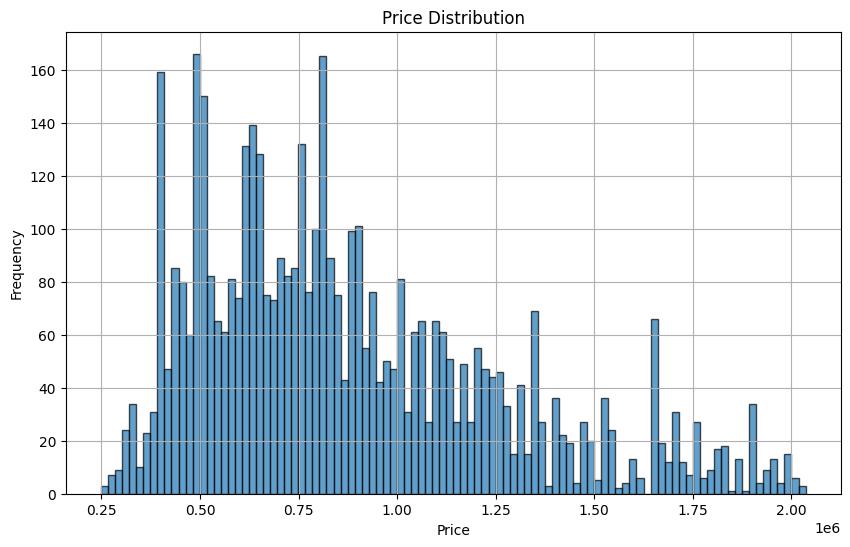

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df_new['price_1_day'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

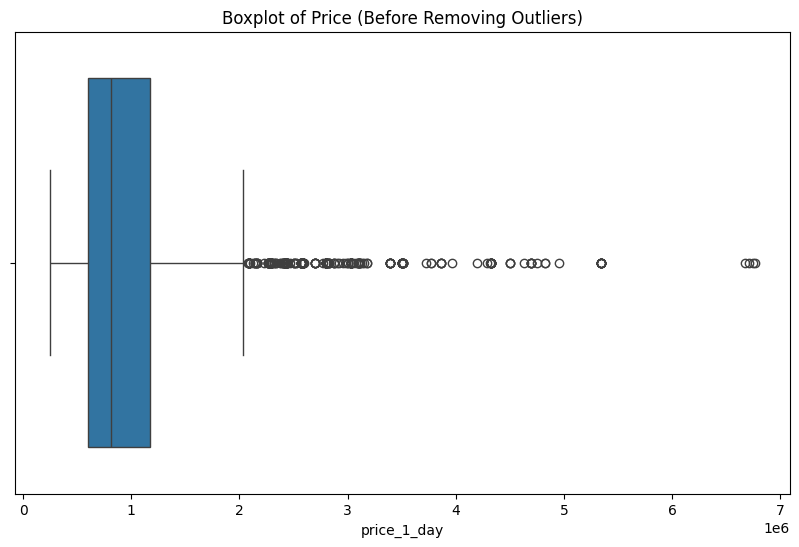

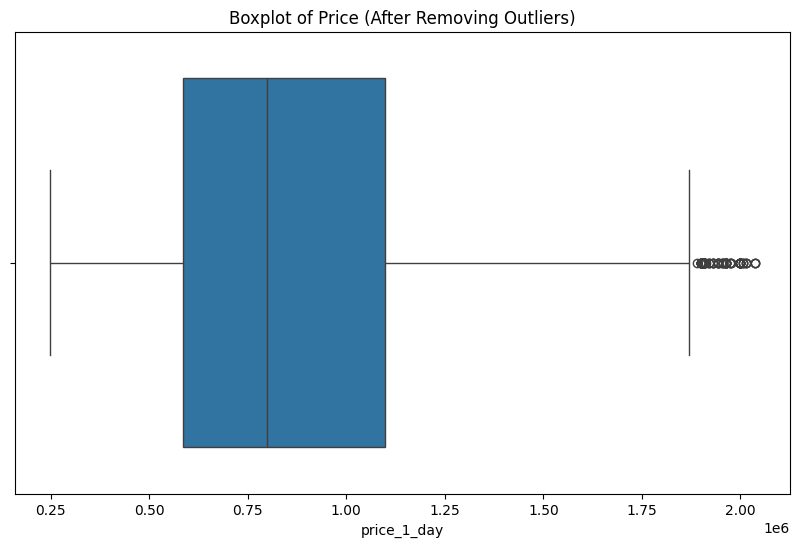

Cleaned DataFrame (Without Outliers):
           lat        lon  price_1_day  Bếp  Chỗ đỗ xe miễn phí tại nơi ở  \
0     21.03382  105.82192       256000  1.0                           1.0   
2     21.06280  105.82350       412469  1.0                           1.0   
4     21.06120  105.82640       370362  1.0                           0.0   
6     21.03133  105.82217       255000  1.0                           1.0   
7     21.02670  105.84210       473901  1.0                           0.0   
...        ...        ...          ...  ...                           ...   
6520  21.02548  105.82108      1108333  1.0                           0.0   
6521  21.21680  105.78120       348333  0.0                           1.0   
6522  21.07339  105.82542       536359  1.0                           0.0   
6524  21.20283  105.83210       495000  0.0                           1.0   
6527  21.02060  105.77910       725000  1.0                           0.0   

      Chỗ ở có camera an ninh ngoài n

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['price_1_day'])
plt.title('Boxplot of Price (Before Removing Outliers)')
plt.show()

# Step 2: Calculate the IQR (Interquartile Range)
Q1 = df_new['price_1_day'].quantile(0.25)  # 25th percentile (lower quartile)
Q3 = df_new['price_1_day'].quantile(0.75)  # 75th percentile (upper quartile)
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers based on the calculated bounds
df_new = df_new[(df_new['price_1_day'] >= lower_bound) & (df_new['price_1_day'] <= upper_bound)]

# Step 4: Plot the boxplot again after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['price_1_day'])
plt.title('Boxplot of Price (After Removing Outliers)')
plt.show()

# Display the cleaned DataFrame (without outliers)
print("Cleaned DataFrame (Without Outliers):")
print(df_new)

In [ ]:
df_new.shape

(4688, 19)

In [ ]:
df = df_new
df.columns = ['lat', 'lon', 'price_1_day', 'kitchen', 'free_parking',
              'security_camera', 'elevator', 'guests', 'beds',
              'bedrooms', 'bathrooms', 'experience', 'TV_features', 'laundry',
              'air_conditioning', 'dryer', 'swimming_pool', 'year', 'month']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb
X = df.drop(columns=['price_1_day'])  # Features (excluding the target column)
y = df['price_1_day']  # Target

bins = [0, 700000, 1500000, float('inf')]
labels = ['low', 'medium', 'high']

# Create binned price categories for stratification
y_binned = pd.cut(y, bins=bins, labels=labels)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, random_state=42
)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Scale the features (only on training data to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Step 4: Train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror',
    n_estimators=300,  # Number of boosting rounds
    learning_rate=0.05,  # Smaller learning rate for better convergence
    max_depth=8,
)# Allow deeper trees
model.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error) as an example metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 58098.259118085225
Mean Absolute Error (MAE): 27441.71
Mean Absolute Percentage Error (MAPE): 3.55%


In [ ]:
import pickle
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully in pickle format.")

Model saved successfully in pickle format.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 61904.5509
Mean Absolute Error (MAE): 24032.74
Mean Absolute Percentage Error (MAPE): 3.24%
R-squared (R2): 0.97


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 280265.7935
Mean Absolute Error (MAE): 212770.27
Mean Absolute Percentage Error (MAPE): 26.80%


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure X_train, X_test, y_train, and y_test are defined

# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Initialize SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_rbf.fit(X_train_scaled, y_train_scaled)

# Predict on the test set (scaled predictions)
y_pred_scaled = svr_rbf.predict(X_test_scaled)

# Convert predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Safely compute MAPE
nonzero_indices = y_test != 0  # Avoid division by zero
mape = np.mean(np.abs((y_test[nonzero_indices] - y_pred[nonzero_indices]) / y_test[nonzero_indices])) * 100

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# print(f"R-squared (R2): {r2:.4f}")


Root Mean Squared Error (RMSE): 92835.8228
Mean Absolute Error (MAE): 49151.55
Mean Absolute Percentage Error (MAPE): 6.58%


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength (default = 1.0)

# Train the model
ridge_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test set (scaled predictions)
y_pred_scaled = ridge_model.predict(X_test_scaled)

# Convert predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Safely compute MAPE
nonzero_indices = y_test != 0  # Avoid division by zero
mape = np.mean(np.abs((y_test[nonzero_indices] - y_pred[nonzero_indices]) / y_test[nonzero_indices])) * 100

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# print(f"R-squared (R2): {r2:.4f}")


Root Mean Squared Error (RMSE): 280265.7935
Mean Absolute Error (MAE): 212765.09
Mean Absolute Percentage Error (MAPE): 26.80%
